In [1]:
%cd '/home/threadripper/PycharmProjects/coh_analysis'

/home/threadripper/PycharmProjects/coh_analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from services.coherence_service import CoherenceService

In [3]:
mpl.rcParams['figure.dpi'] = 200
sns.set_style("whitegrid")

In [4]:
coherence_service = CoherenceService(shuffled=True)
coherence_service.load_from_cache()

In [5]:
def group_by_length(significance_service, feature):
    row = []
    mapping = {}
    for coh, length in significance_service.data[[feature, 'length']].dropna().values:
        key = int(10 * (length // 10))
        if key < 10:
            print('No')
        if key > 100:
            continue
        mapping.setdefault(key, []).append(coh)
        row.append([int(key), coh])
    data = pd.DataFrame(row, columns=['length', feature])
    mapping = list(mapping.items())
    mapping.sort()
    return data, mapping

In [6]:
speechiness_data, speechiness_mapping = group_by_length(coherence_service, 'speechiness')
danceability_data, danceability_mapping = group_by_length(coherence_service, 'danceability')

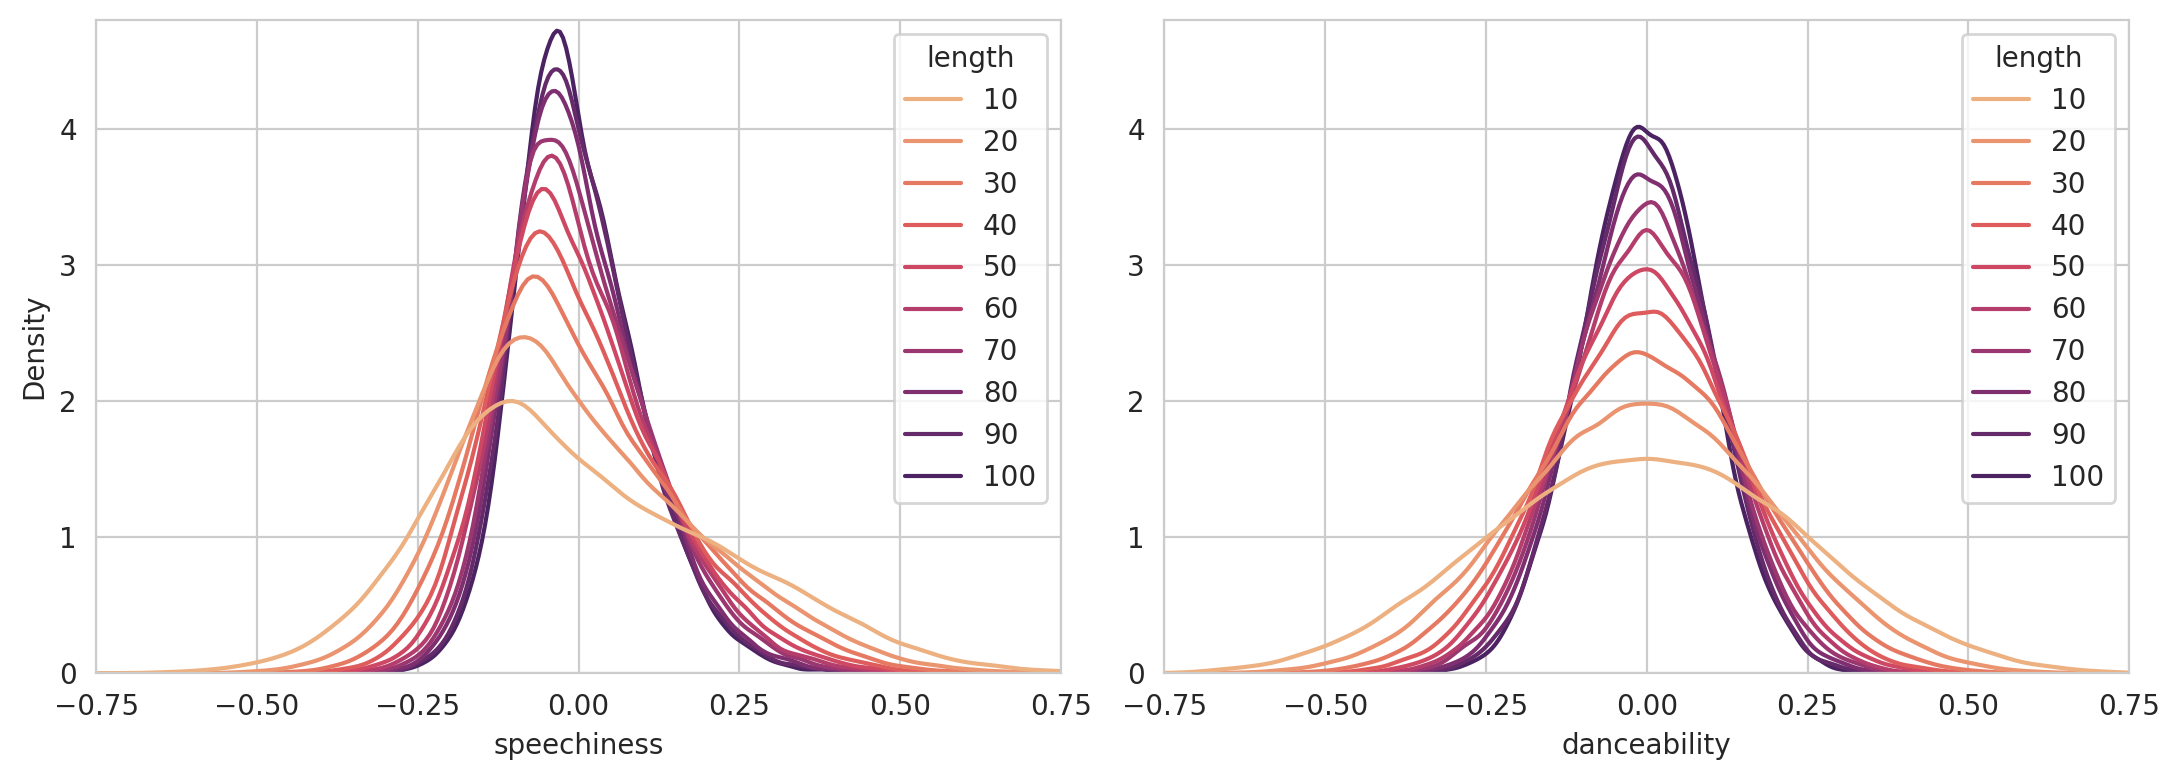

In [7]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(11, 4))
sns.kdeplot(speechiness_data, x='speechiness', hue='length', common_norm=False, palette="flare", ax=ax0)
ax0.set_yticks(np.arange(0, 5, step=1.0))
ax0.set_ylim((0, 4.8))
ax0.set_xlim((-0.75, 0.75))
ax0.set_xticks(np.arange(-0.75, 0.76, step=0.25))


sns.kdeplot(danceability_data, x='danceability', hue='length', common_norm=False, palette="flare", ax=ax1)
ax1.set_yticks(np.arange(0, 5, step=1.0))
ax1.set_ylim((0, 4.8))
ax1.set_xlim((-0.75, 0.75))
ax1.set_xticks(np.arange(-0.75, 0.76, step=0.25))
ax1.set_ylabel(None)

plt.tight_layout()
plt.savefig('plots/fig_length_influcence_kde.png')
plt.show()

In [8]:
pd.DataFrame([(x, len(y), np.mean(y), np.median(y)) for x, y in speechiness_mapping], columns=['length', 'size', 'mean', 'median'])

,length,size,mean,median
0,10,99489,0.000362,-0.032118
1,20,117692,-0.000220,-0.027261
2,30,94154,0.000608,-0.022108
3,40,73552,0.000476,-0.019036
4,50,56239,0.000601,-0.016421
5,60,42833,0.000168,-0.015464
6,70,33084,0.001077,-0.012748
7,80,25858,-0.001076,-0.013255
8,90,20271,-0.000253,-0.011688
9,100,17537,0.000701,-0.011382
